Problem 6: Finite-Size Scaling and Critical Exponents


The two-dimensional Ising model consists of N × N spins arranged on a square lattice. Each spin can take the values si ∈ {−1, +1}. The energy H in a the absence of a magnetic field is given by
$$\mathcal H = -\sum_{<ij>} J s_i s_j$$

where <ij> indicates nearest-neighbor pairs. To avoid boundary effects, periodic boundary conditions are employed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initial_configuration(N):
    return np.ones((N,N))

def magnetization_config(config):
    return np.sum(config)

def sum_variance_M(M_t):
    return np.var(M_t)

def Binder_cumulant(M_t):
    M2 = np.mean(np.power(M_t,2))
    M4 = np.mean(np.power(M_t,4))
    return 1-M4/(3*M2**2)

def magnetization_per_spin(M_t,N):
    np.mean(M_t)/N**2
    
def Metropolis(config,betaJ):
    N = len(config)
    x_flip = np.random.randint(0,N)
    y_flip = np.random.randint(0,N)
    alpha = np.random.random()
    beta_delta_E = betaJ*2*config[x_flip,y_flip]*(config[(x_flip+1)%N,y_flip]+config[(x_flip-1)%N,y_flip]+config[x_flip,(y_flip-1)%N]+config[x_flip,(y_flip+1)%N])
    if beta_delta_E <= 0:
        config[x_flip,y_flip] = -config[x_flip,y_flip] 
    else:
        if np.exp(-beta_delta_E)>alpha:
            config[x_flip,y_flip] = -config[x_flip,y_flip]
    return config


def animation_gif(N,betaJ):
    k_BTJ = 1/betaJ
    fig,ax = plt.subplots()
    config = initial_configuration(N)
    def update(frame, config):
        # Run the Metropolis algorithm for nsteps steps
        for step in range(1000):
            Metropolis(config, betaJ)
        # Update the plot
        ax.clear()
        ax.imshow(config, cmap='binary', vmin=-1, vmax=1)
        ax.set_title(f'Temperature: {k_BTJ:.1f}, Step: {frame+1}')

    # Define the animation
    ani = animation.FuncAnimation(fig, update, frames=10, fargs=(config,), repeat=True)

    # Save the animation as a gif file
    ani.save('ising2.gif', writer='imagemagick', fps=30)


MovieWriter imagemagick unavailable; using Pillow instead.


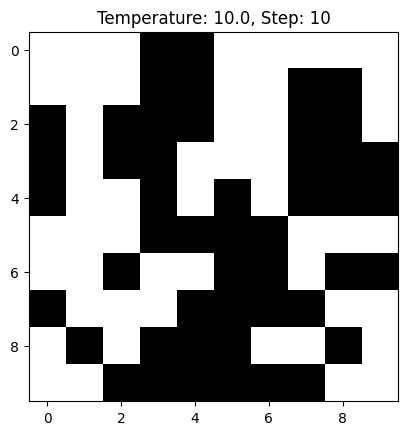

In [2]:
animation_gif(10,0.1)

(a) For fixed systems size N = 10, calculate the total magnetization ⟨M⟩ and the susceptibility (per spin)
$$\chi = \frac{1}{k_B T N^2} [<M^2> - <M>^2]$$
as a function of temperature k_B T/J =1.0,1.5,2.0,2.2,2.5,3.0,3.5,4.0.

In [3]:
kbtJ_list = np.array([1.0,1.5,2.0,2.2,2.5,3.0,3.5,4.0])
betaJ_list = 1/kbtJ_list
N = 10
steps = 100000

chi_list = []
M_aver_list = []
for betaJ in betaJ_list:
    config = initial_configuration(N)
    M_t = []
    for i in range(steps):
        Metropolis(config,betaJ)
        M = magnetization_config(config)
        M_t.append(M)
    M_aver_list.append(np.mean(M_t[500:]))
    chi = betaJ/N**2*sum_variance_M(M_t)
    chi_list.append(chi)
        

Text(0, 0.5, 'Total magnetization')

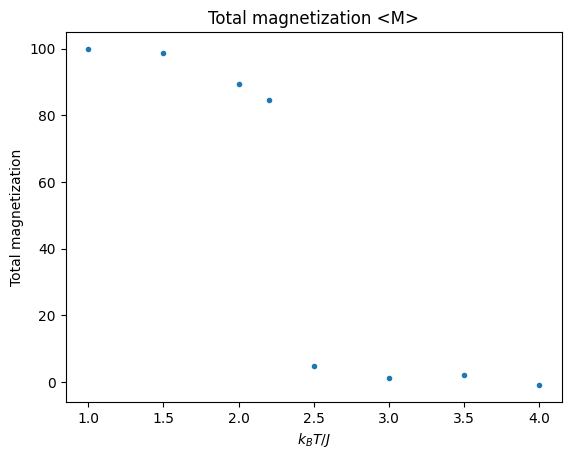

In [4]:
plt.plot(kbtJ_list,M_aver_list,'.')
plt.title('Total magnetization <M>')
plt.xlabel(r'$k_B T/J$')
plt.ylabel('Total magnetization')

Text(0, 0.5, '$\\chi$')

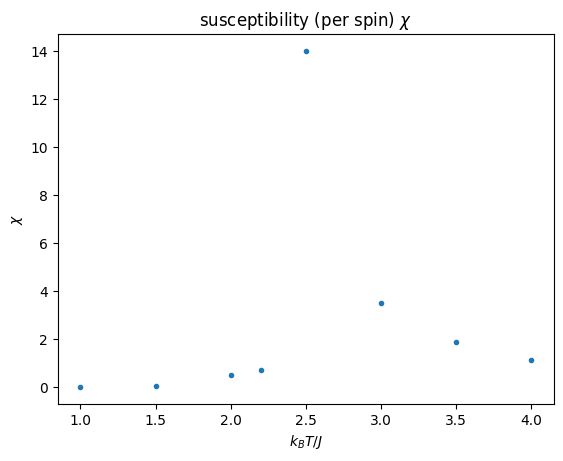

In [5]:
plt.plot(kbtJ_list,chi_list,'.')
plt.title(r'susceptibility (per spin) $\chi$')
plt.xlabel(r'$k_B T/J$')
plt.ylabel(r'$\chi$')

(b) In order to determine the critical temperature, it is often convenient to consider the
“Binder cumulant”. For an Ising model with zero field, it is given by

$$U_4 = 1-<M^4>/(3<M^2>^2)$$
where M is the total magnetization. It is therefore a fourth order cumulant, related to
the kurtosis. In the thermodynamic limit, where the system size L → ∞, U4 → 0 for
T > Tc, and U4 → 2/3 for $T < T_c$. Thus, the function is discontinuous in this limit. The
intersection points of the cumulants for different system sizes usually depend only rather
weakly on system size.
Use the Binder cumlant to determine Tc.

In [6]:
kbtJ_list = np.linspace(0.01,10,50)
betaJ_list = 1/kbtJ_list
N = 100
steps = 10000

U4_list = []
for betaJ in betaJ_list:
    config = initial_configuration(N)
    M_t = []
    for i in range(steps):
        Metropolis(config,betaJ)
        M = magnetization_config(config)
        M_t.append(M)
    U4 = Binder_cumulant(M_t[500:])
    U4_list.append(U4)
        

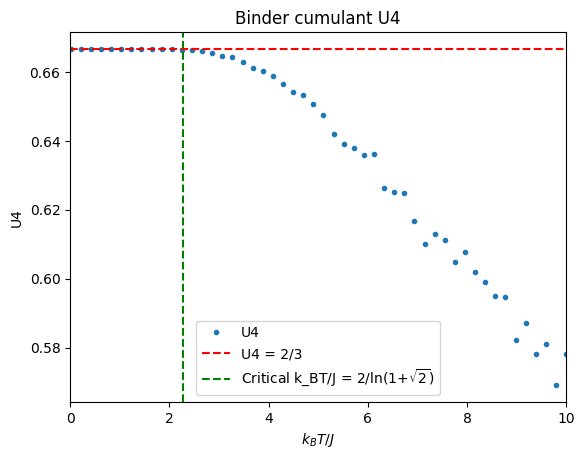

In [7]:
kbtj_critical = 2/np.log(1+np.sqrt(2))
plt.plot(kbtJ_list,U4_list,'.',label='U4')
plt.xlim((0,kbtJ_list[-1]))
plt.title('Binder cumulant U4')
plt.xlabel(r'$k_B T/J$')
plt.ylabel('U4')
plt.axhline(y=2/3,color='r',linestyle='--',label = 'U4 = 2/3')
plt.axvline(x=kbtj_critical,color='g',linestyle='--',label = 'Critical k_BT/J = 2/ln(1+$\sqrt{2}$)')
plt.legend()

(c) At the critical temperature kBTc/J = 2/ ln(1 + √
2), calculate the total magnetization
per spin $⟨m⟩ = ⟨M⟩/N^2$ and the susceptibility per spin χ for the system sizes N =
10, 20, 30, .... Determine the critical exponent γ/ν from finite-size scaling

In [8]:
betaJ_critical = 1/kbtj_critical
N_list = range(10,70,10)
m_list = []
steps = 10000
chi_list =[]
for N in N_list:
    config = initial_configuration(N)
    M_t = []
    
    for i in range(steps):
        Metropolis(config,betaJ)
        M = magnetization_config(config)
        M_t.append(M)
    m = np.mean(M_t[500:])/N**2
    m_list.append(m)
    chi = betaJ/N**2*sum_variance_M(M_t[500:])
    chi_list.append(chi)
    

Text(0, 0.5, '<m>')

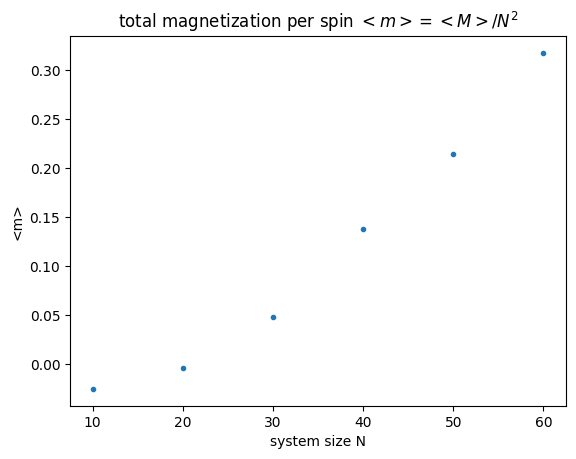

In [9]:
plt.plot(N_list,m_list,'.')
plt.title('total magnetization per spin $<m> = <M>/N^2$')
plt.xlabel(r'system size N')
plt.ylabel(r'<m>')

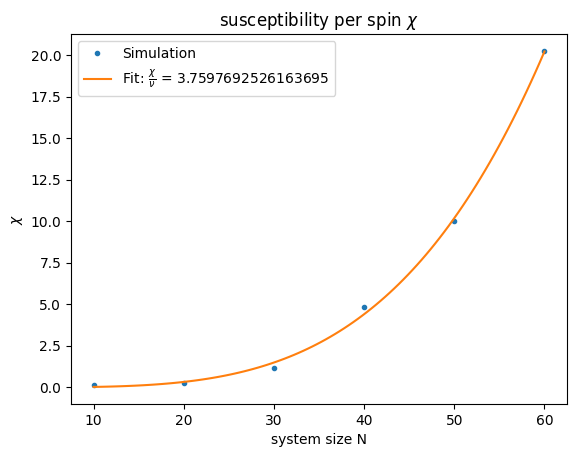

In [10]:
from scipy.optimize import curve_fit

def func(N,k,chi_nu):
    return k*N**chi_nu

popt,pcov = curve_fit(func,N_list,chi_list)

x = np.linspace(10,N_list[-1],100)
fit_func =  func(x,*popt)
plt.plot(N_list,chi_list,'.',label = 'Simulation')
plt.plot(x,fit_func,label = 'Fit: '+r'$\frac{\chi}{\nu}$ = '+str(popt[-1]))
plt.title('susceptibility per spin $\chi$')
plt.xlabel(r'system size N')
plt.ylabel(r'$\chi$')
plt.legend()

In [11]:
kbtJ_list = np.linspace(0.01,10,10)
betaJ_list = 1/kbtJ_list
N = 1000
steps = 100000

U4_list = []
for betaJ in betaJ_list:
    config = initial_configuration(N)
    M_t = []
    for i in range(steps):
        Metropolis(config,betaJ)
        M = magnetization_config(config)
        M_t.append(M)
    U4 = Binder_cumulant(M_t[500:])
    U4_list.append(U4)
    
kbtj_critical = 2/np.log(1+np.sqrt(2))
plt.plot(kbtJ_list,U4_list,'.',label='U4')
plt.xlim((0,kbtJ_list[-1]))
plt.title('Binder cumulant U4')
plt.xlabel(r'$k_B T/J$')
plt.ylabel('U4')
plt.axhline(y=2/3,color='r',linestyle='--',label = 'U4 = 2/3')
plt.axvline(x=kbtj_critical,color='g',linestyle='--',label = 'Critical k_BT/J = 2/ln(1+$\sqrt{2}$)')
plt.legend()